<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
cd ..

/master


In [2]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#%load_ext autoreload
#%autoreload 2
#%pdb

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ""

import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch
torch.set_num_threads(8)

Autosaving every 600 seconds


In [3]:
import numpy as np
import pdb
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from utils.data import get_train_dev_test_ssl
from pretrained import load_pretrained
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta
from sklearn.neural_network import MLPClassifier

from utils.visualize import plot_2D_decision_boundary_SSL
train, dev, test = get_train_dev_test_ssl("mnist")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 2D M1 SSL

In [4]:
vae = load_pretrained("vae", "mnist", transform_dim=2)
# precompute transformed datasets
transformed_train = vae.transform(train)
transformed_test = vae.transform(test)

In [5]:
labelspread = LabelSpreading().fit(transformed_train, train.targets)
labelspread.score(transformed_test, test.targets)

0.8603

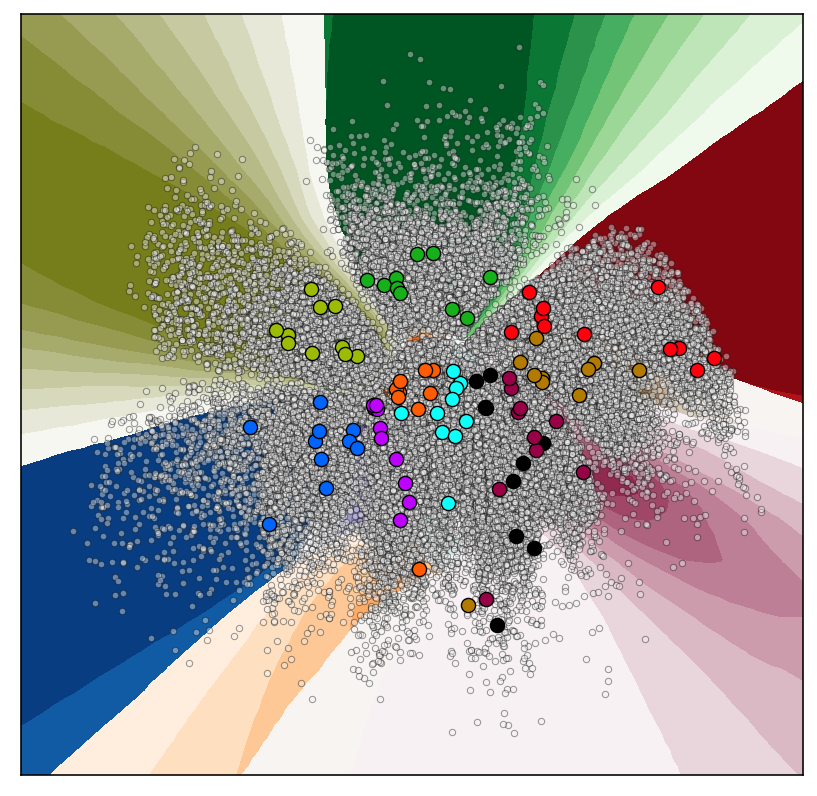

In [6]:
plot_2D_decision_boundary_SSL(transformed_train, train.targets, labelspread, mesh_stepsize=0.1)

In [7]:
sslmlp = SelfTrainingMeta(MLPClassifier(solver="lbfgs"), max_iter=50, weight_pred=.05)
sslmlp.fit(transformed_train, train.targets)
sslmlp.score(transformed_test, test.targets)

0.8026

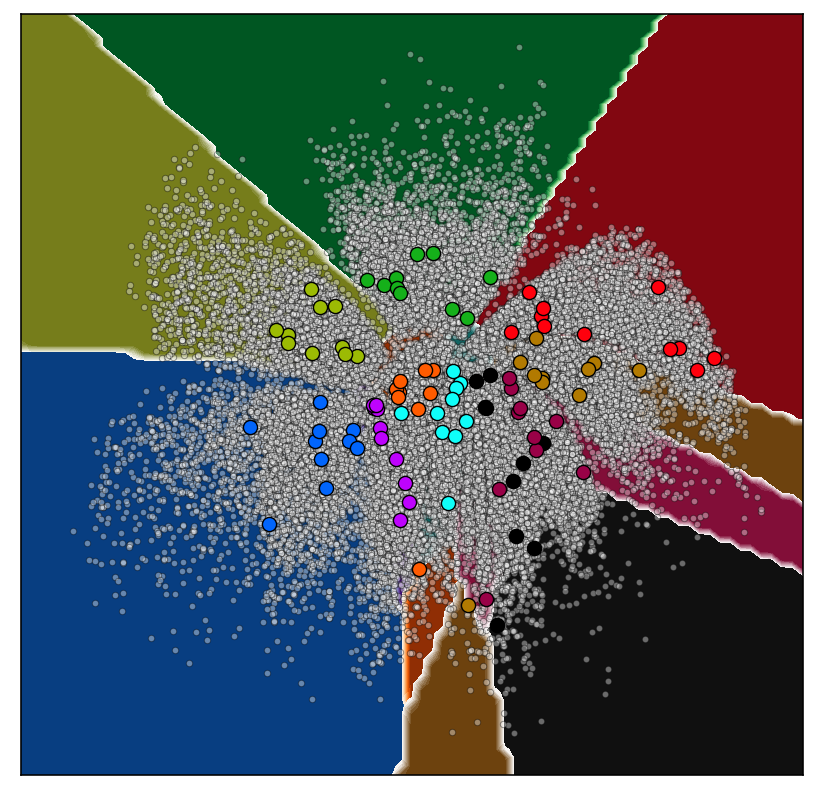

In [8]:
plot_2D_decision_boundary_SSL(transformed_train, train.targets, sslmlp, mesh_stepsize=0.1)

# 2D M1 Supervised

In [9]:
mlp = MLPClassifier(solver="lbfgs")
mlp.fit(transformed_train[train.targets!=-1], train.targets[train.targets!=-1])
mlp.score(transformed_test, test.targets)

0.8083

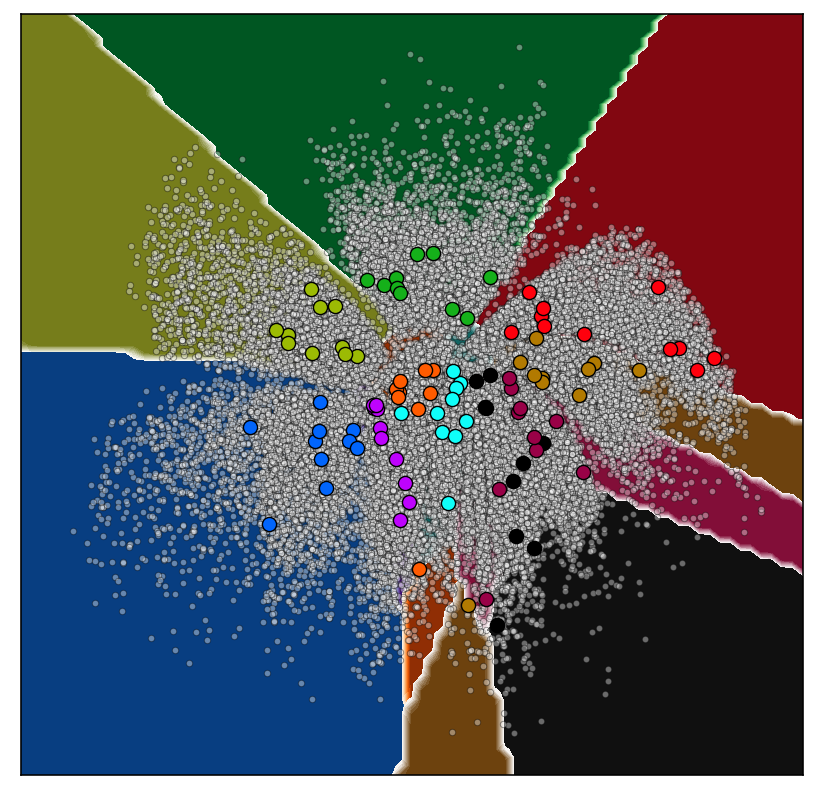

In [10]:
plot_2D_decision_boundary_SSL(transformed_train, train.targets, sslmlp, mesh_stepsize=0.1)